## Introduction to Python in HPC - Pandas 

### Introduction

* In this notebook we look at Pandas which is a "go-to" library for data scientist 

* Pandas sits on top of numpy and offers data structures and operations for array manipulation and time series analysis

* Pandas uses DataFrame to organize dictionaries, lists, Numpy arrays, and files


### Exploring Data: Analysis with NumPy and Pandas

In [1]:
#
# import pandas right after you bring in numpy
#
import numpy as np
import pandas as pd

In [2]:
#
# Creating a series or n-dimensional array by passing a list of values. 
# Pandas creates an integer idex for you
#
s = pd.Series([4,5,3, 100, 55])
s

0      4
1      5
2      3
3    100
4     55
dtype: int64

In [3]:
#
#Create a DataFrame using a NumPy array with date time index and labeled columns
#
dates = pd.date_range('20200101', periods = 6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,2), index = dates, columns=list('AB'))
df

,A,B
2020-01-01,-2.624148,-0.900290
2020-01-02,0.869182,-0.159108
2020-01-03,-1.494230,-2.499442
2020-01-04,0.690889,-0.266961
2020-01-05,-1.047293,0.301512
2020-01-06,-1.049017,-0.507049


In [5]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

### Dataframes with NumPy Arrays and Dictionaries 

In [7]:
#
# Create a Pandas Dataframe with Dict which are the column labels, often times, variable names and date.
# Values can be contained in tuple, list NumPy array, or PandaSeries object
#
d = {'x': [1,2,3], 'y': np.array([3,5,7]), 'z': 100}
pd.DataFrame(d)


,x,y,z
0,1,3,100
1,2,5,100
2,3,7,100


In [8]:
#
# Create DataFrame by passing a dict of objects to be conveted to series-like structure
#
df2 = pd.DataFrame({'VarA': 1.,
                       'VarB': pd.Timestamp('20200102'),
                       'VarC': pd.Series(1, index=list(range(4)), dtype='float32'),
                       'VarD': np.array([3] *4, dtype='int32'),
                       'VarE': pd.Categorical(["cat1", "cat2", "cat3", "cat4"]),
                       'VarF': 'huricane' 
                      })
df2


,VarA,VarB,VarC,VarD,VarE,VarF
0,1.0,2020-01-02,1.0,3,cat1,huricane
1,1.0,2020-01-02,1.0,3,cat2,huricane
2,1.0,2020-01-02,1.0,3,cat3,huricane
3,1.0,2020-01-02,1.0,3,cat4,huricane


In [9]:
df2.dtypes

VarA           float64
VarB    datetime64[ns]
VarC           float32
VarD             int32
VarE          category
VarF            object
dtype: object

In [10]:
#
# Explore the data by taking quick look at top and bottom rows of the frame
#
df2.head(2)

,VarA,VarB,VarC,VarD,VarE,VarF
0,1.0,2020-01-02,1.0,3,cat1,huricane
1,1.0,2020-01-02,1.0,3,cat2,huricane


In [11]:
df2.tail(1)

,VarA,VarB,VarC,VarD,VarE,VarF
3,1.0,2020-01-02,1.0,3,cat4,huricane


### What does this look like as a numpy array??

In [15]:
df.to_numpy()

array([[-2.62414847, -0.90029031],
       [ 0.86918233, -0.15910768],
       [-1.49422982, -2.49944172],
       [ 0.69088927, -0.26696103],
       [-1.0472931 ,  0.30151232],
       [-1.04901684, -0.50704869]])

In [16]:
#
# It can hold the entire array regardless of datatype
#
df2.to_numpy()

array([[1.0, Timestamp('2020-01-02 00:00:00'), 1.0, 3, 'cat1',
        'huricane'],
       [1.0, Timestamp('2020-01-02 00:00:00'), 1.0, 3, 'cat2',
        'huricane'],
       [1.0, Timestamp('2020-01-02 00:00:00'), 1.0, 3, 'cat3',
        'huricane'],
       [1.0, Timestamp('2020-01-02 00:00:00'), 1.0, 3, 'cat4',
        'huricane']], dtype=object)

### Exploring your array with some DataFrame Statistics

In [17]:
df.describe()

,A,B
count,6.000000,6.000000
mean,-0.775769,-0.671890
std,1.337014,0.979154
min,-2.624148,-2.499442
25%,-1.382927,-0.801980
50%,-1.048155,-0.387005
75%,0.256344,-0.186071
max,0.869182,0.301512


In [18]:
#
# Transpose your Dataframe
#
df.T

,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00
A,-2.624148,0.869182,-1.494230,0.690889,-1.047293,-1.049017
B,-0.900290,-0.159108,-2.499442,-0.266961,0.301512,-0.507049


In [19]:
#
# sort along axis
#
df.sort_index(axis=1, ascending=False)

,B,A
2020-01-01,-0.900290,-2.624148
2020-01-02,-0.159108,0.869182
2020-01-03,-2.499442,-1.494230
2020-01-04,-0.266961,0.690889
2020-01-05,0.301512,-1.047293
2020-01-06,-0.507049,-1.049017


In [20]:
#
# sort by variable
#
df.sort_values(by='A')

,A,B
2020-01-01,-2.624148,-0.900290
2020-01-03,-1.494230,-2.499442
2020-01-06,-1.049017,-0.507049
2020-01-05,-1.047293,0.301512
2020-01-04,0.690889,-0.266961
2020-01-02,0.869182,-0.159108


In [21]:
#
# Pull row like in df.A or with [] to be more specific on colomn label 
#
df['A']

2020-01-01   -2.624148
2020-01-02    0.869182
2020-01-03   -1.494230
2020-01-04    0.690889
2020-01-05   -1.047293
2020-01-06   -1.049017
Freq: D, Name: A, dtype: float64

In [22]:
df.A

2020-01-01   -2.624148
2020-01-02    0.869182
2020-01-03   -1.494230
2020-01-04    0.690889
2020-01-05   -1.047293
2020-01-06   -1.049017
Freq: D, Name: A, dtype: float64

In [23]:
#
# Selection by Location index...Indexing starts at 0.
#
df.iloc[0]

A   -2.624148
B   -0.900290
Name: 2020-01-01 00:00:00, dtype: float64

#### Question? Since this is a small array, how can you spot check to see if the above is correct.

In [25]:
#
# like in Numpy, you can use integers to find specific location 
#
df.iloc[1:2, 0:1]

,A
2020-01-02,0.869182


In [26]:
#
# no slice by row
#
df.iloc[0:1,:]

,A,B
2020-01-01,-2.624148,-0.90029


In [27]:
#
# Now lets do the same slice but this time by colomns
#
df.iloc[:,0:1]

,A
2020-01-01,-2.624148
2020-01-02,0.869182
2020-01-03,-1.494230
2020-01-04,0.690889
2020-01-05,-1.047293
2020-01-06,-1.049017


In [28]:
#
#spot check a specific location in the array
#
df.iloc[0,1]

-0.9002903077189971

In [29]:
#
# Boolean indexing lets you index by value
#
df[df['A'] < 0.5]

,A,B
2020-01-01,-2.624148,-0.900290
2020-01-03,-1.494230,-2.499442
2020-01-05,-1.047293,0.301512
2020-01-06,-1.049017,-0.507049


In [30]:
#
#Timeseries functions like pd.Series can also have a name attribute
#
s = pd.Series(np.random.randn(5), name='dataseries')
s

0   -0.488296
1    0.763222
2   -0.921816
3   -0.903778
4   -2.837714
Name: dataseries, dtype: float64

### Plotting Example

In [1]:
# importing modules 
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [2]:
# Creating a Pandas dataframe with random values between 0-100
number_of_values = 20
df = pandas.DataFrame(np.random.randint(0,100,size=(100, 2)),    # Creating pandas dataframe
                      columns=['X','Values']) 
print(df)

     X  Values
0   51      34
1   47      61
2   67      85
3   44      65
4   24      14
..  ..     ...
95  94      42
96  14      66
97  23      18
98   9      45
99  69      89

[100 rows x 2 columns]


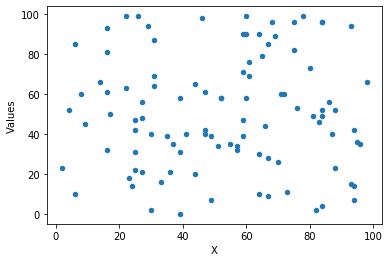

In [3]:
df.plot.scatter(x='X', y='Values');   #Creating a basic scatter plot

## Questions
Can you infer anything from the data? Is it grouped a certain way? Is there a trend? Is it completly random?

In [4]:
# Creating a function named regression that calculates the slope and intercept of 
# the line-of-best-fit

def regression(x,y):
    """ This function calculates a simple linear regression
    This is done by checking that the inputs are 1-D
    Arrays and then find the slope and intercept. """
    a = (sum(y)*sum(np.square(x)) - sum(x)*sum(x*y))/\
        (len(x)*sum(np.square(x))-sum(x)*sum(x))

    b = (len(x)*sum(x*y) - sum(x)*sum(y))/\
        (len(x)*sum(np.square(x))-(sum(x)*sum(x)))
    return a,b #a is y intercept, b is slope

Text(0, 0.5, 'Values')

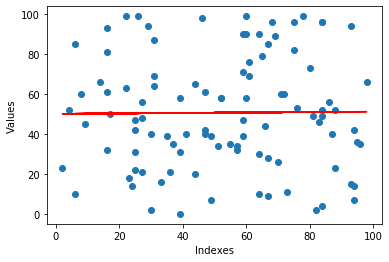

In [6]:
[a,b] = regression(df['X'],df['Values'])   #Calling regression function

# Plotting figures
fig,ax = plt.subplots()                     #Creating figure object and axis object
ax.scatter(df['X'],df['Values'])            #Creating scatter plot by utilizing the scatter method
ax.plot(df['X'],a+b*df['X'],color='r')      #Plotting the regression line by utilizing plot method and regression function
ax.set_xlabel('Indexes')                    # Setting X labels
ax.set_ylabel('Values')                     # Setting Y labels
